# Homework 2 PSTAT 234 Ben Fox
## Accessing Strava Data

Strava uses a RESTful API. A RESTful API is an API (application program interface) that uses HTTP requests to GET, POST, PUT, and DELETE data. A very useful command line tool to access this data is HTTPie which performs the http task requested and returns data in json format. HTTPie is detailed here: [HTTPie](https://httpie.org/). HTTPie was installed to access data. Additionally, Strava's API uses a 3-Legged OAuth Flow to access user data. Due to the time restraints, I only look at my data, since it would take more time to get authorization to access other users' data, see [Strava OAuth](http://developers.strava.com/docs/authentication/). Detailed descriptions of how to use Strava's API with HTTPie can be found here: [Strava API Reference](https://developers.strava.com/docs/reference/), and a description of the API is here: [Strava API Description](https://developers.strava.com/docs/).

In [1]:
! pip install httpie

You are using pip version 9.0.1, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
# Configure OAuth2 access token for authorization: strava_oauth
access_token = '9cc5fb5cf3c8cc57164a203fb86a1cc504ed729f' # this is my access token to access my Strava data
strava_id = 26129648 # this is my Strava ID

Each Strava user has a unique identifier given in their profile. Mine is 26129648, which is evident in my profile page url at https://www.strava.com/athletes/26129648. A unique access token is required to access data for each user ID. For example, if I want to grab athlete data, I need their access token. My data is shown below.

In [3]:
! http GET "https://www.strava.com/api/v3/athlete" "Authorization: Bearer {access_token}"

HTTP/1.1 200 OK
Cache-Control: max-age=0, private, must-revalidate
Connection: keep-alive
Content-Encoding: gzip
Content-Length: 585
Content-Type: application/json; charset=UTF-8
Date: Thu, 26 Apr 2018 03:05:31 GMT
ETag: W/"b9444df1f5a285613c3e306553d381c9"
Status: 200 OK
X-Content-Type-Options: nosniff
X-FRAME-OPTIONS: DENY
X-RateLimit-Limit: 600,30000
X-RateLimit-Usage: 1,1
X-Request-Id: 6c98cfdf-3ece-49ef-b726-4045368c64cc


{
    "athlete_type": 1,
    "badge_type_id": 0,
    "bikes": [],
    "city": "Los Angeles",
    "clubs": [
        {
            "admin": false,
            "city": "Goleta",
            "country": "United States",
            "cover_photo": null,
            "cover_photo_small": null,
            "featured": false,
            "id": 171748,
            "member_count": 26,
            "membership": "member",
            "name": "UCSB Running Club",
            "owner": false,
            "private": false,
            "profile": "https://dgalywyr863hv.cloudfront

This displays various info about my profile. It can also be set to a variable, which gives the info in json format.

In [4]:
myjson = ! http GET "https://www.strava.com/api/v3/athlete" "Authorization: Bearer {access_token}"
myjson

['{"id":26129648,"username":"benmfox","resource_state":3,"firstname":"Ben","lastname":"Fox","city":"Los Angeles","state":"California","country":"United States","sex":"M","premium":false,"created_at":"2017-11-07T23:11:19Z","updated_at":"2018-04-22T23:39:42Z","badge_type_id":0,"profile_medium":"https://dgalywyr863hv.cloudfront.net/pictures/athletes/26129648/7563551/1/medium.jpg","profile":"https://dgalywyr863hv.cloudfront.net/pictures/athletes/26129648/7563551/1/large.jpg","friend":null,"follower":null,"email":"benmfox@me.com","follower_count":29,"friend_count":48,"mutual_friend_count":0,"athlete_type":1,"date_preference":"%m/%d/%Y","measurement_preference":"feet","clubs":[{"id":171748,"resource_state":2,"name":"UCSB Running Club","profile_medium":"https://dgalywyr863hv.cloudfront.net/pictures/clubs/171748/3720145/1/medium.jpg","profile":"https://dgalywyr863hv.cloudfront.net/pictures/clubs/171748/3720145/1/large.jpg","cover_photo":null,"cover_photo_small":null,"sport_type":"running","cit

In [5]:
import json # import python's json library and re-express data
myData = json.loads(myjson[0])
myData

{'athlete_type': 1,
 'badge_type_id': 0,
 'bikes': [],
 'city': 'Los Angeles',
 'clubs': [{'admin': False,
   'city': 'Goleta',
   'country': 'United States',
   'cover_photo': None,
   'cover_photo_small': None,
   'featured': False,
   'id': 171748,
   'member_count': 26,
   'membership': 'member',
   'name': 'UCSB Running Club',
   'owner': False,
   'private': False,
   'profile': 'https://dgalywyr863hv.cloudfront.net/pictures/clubs/171748/3720145/1/large.jpg',
   'profile_medium': 'https://dgalywyr863hv.cloudfront.net/pictures/clubs/171748/3720145/1/medium.jpg',
   'resource_state': 2,
   'sport_type': 'running',
   'state': 'California',
   'url': 'ucsbrunning',
   'verified': False}],
 'country': 'United States',
 'created_at': '2017-11-07T23:11:19Z',
 'date_preference': '%m/%d/%Y',
 'email': 'benmfox@me.com',
 'firstname': 'Ben',
 'follower': None,
 'follower_count': 29,
 'friend': None,
 'friend_count': 48,
 'ftp': None,
 'id': 26129648,
 'lastname': 'Fox',
 'measurement_prefe

# Problem 1- Data Download
The above data is my profile data, which is very uninteresting; I am more interested in the other data I can get. For example, I can get the races throughout the world that people have logged on Strava. 

In [6]:
year = ['2014','2015','2016','2017','2018'] # strava only has races logged since 2014
races_json = []
for i in range(len(year)): # get race data for each year since 2014
    temp = ! http GET "https://www.strava.com/api/v3/running_races?year={year[i]}" "Authorization: Bearer {access_token}"
    races_json += temp

In [7]:
raceData = [] # combine all year data into one
for i in range(len(races_json)):
    raceData += json.loads(races_json[i])
raceData

[{'city': 'Paris',
  'country': 'France',
  'distance': 42195.0,
  'id': 16,
  'measurement_preference': None,
  'name': 'Paris Marathon',
  'resource_state': 2,
  'running_race_type': 0,
  'start_date_local': '2014-04-06T08:45:00Z',
  'state': '',
  'url': '2014-paris-marathon'},
 {'city': 'Boston',
  'country': 'USA',
  'distance': 42195.0,
  'id': 2,
  'measurement_preference': 'feet',
  'name': 'Boston Marathon',
  'resource_state': 2,
  'running_race_type': 0,
  'start_date_local': '2014-04-21T10:00:00Z',
  'state': 'MA',
  'url': '2014-boston-marathon'},
 {'city': 'Squaw Valley',
  'country': 'USA',
  'distance': 160934.0,
  'id': 22,
  'measurement_preference': 'feet',
  'name': 'Western States',
  'resource_state': 2,
  'running_race_type': 1,
  'start_date_local': '2014-06-28T05:00:00Z',
  'state': 'CA',
  'url': '2014-western-states'},
 {'city': 'Atlanta',
  'country': 'USA',
  'distance': 10000.0,
  'id': 23,
  'measurement_preference': None,
  'name': 'Peachtree Road Race',

In [8]:
import pandas as pd
import numpy as np
# create a data frame of the data
d = [list(raceData[i].values()) for i in range(len(raceData))]
h = list(raceData[0].keys())
races = pd.DataFrame(d, columns=h)
raceDist = np.round(races.distance/1000, decimals=3) # store for widget later
races.head()

,id,name,start_date_local,distance,city,state,country,measurement_preference,running_race_type,url,resource_state
0,16,Paris Marathon,2014-04-06T08:45:00Z,42195.0,Paris,,France,None,0.0,2014-paris-marathon,2
1,2,Boston Marathon,2014-04-21T10:00:00Z,42195.0,Boston,MA,USA,feet,0.0,2014-boston-marathon,2
2,22,Western States,2014-06-28T05:00:00Z,160934.0,Squaw Valley,CA,USA,feet,1.0,2014-western-states,2
3,23,Peachtree Road Race,2014-07-04T07:30:00Z,10000.0,Atlanta,GA,USA,None,0.0,2014-peachtree,2
4,1,San Francisco Marathon,2014-07-27T05:30:00Z,42195.0,San Francisco,CA,USA,feet,0.0,2014-san-francisco-marathon,2


Notice, this data needs some preproccessing done. The columns measurement_preference, url, running_race_type, and resource_state can be removed. Also, the distances can be scaled to kilometers and races without a country were removed. 

In [9]:
races = races.drop(['measurement_preference', 'running_race_type', 'url','resource_state'], axis = 1)
races = races[pd.notnull(races['country'])]
races.rename(columns={'start_date_local':'year'}, inplace=True)
races.distance = np.round(races.distance/1000, 0)
races.distance = races.distance.apply(str) + 'k'
pd.unique(races.country)

array(['France', 'USA', 'Brazil', 'Canada', 'UK', 'Germany', 'Romania',
       'Australia', 'United States', 'The Netherlands', 'United Kingdom',
       'Netherlands', 'Ireland', 'South Africa', 'New Zealand', 'China',
       'Japan', 'Turkey', 'Spain', 'Italy', 'Singapore', 'India',
       'Philipines', 'Malta', 'Nettherlands', 'Austria', 'Germany ',
       'Greece', 'Italy ', 'Poland', 'Switzerland', 'Norway', 'Belgium',
       'Denmark', 'Czech Republic', 'US', 'Sweden', 'Austrailia',
       'Finland', 'Iceland', 'Virginia', 'Russia', 'Portugal', 'IItaly',
       'Mexico', 'Taiwain', 'UAE', 'Morrocco', 'Hungary', 'England',
       'Guatemala', 'Thailand', 'Hong Kong', 'Malaysia', 'South Korea',
       'Philippines', 'Czechia', 'Indonesia', 'Luxembourg', 'Colombia',
       'Argentina', 'NL', 'USA ', 'Slovenia', 'Taiwan', 'Österreich ',
       'Brasil'], dtype=object)

Additionally, the countries data needs to be fixed, as seen above. Lastly, start_date_local was changed to race year.

In [10]:
races.country = races.country.replace({'USA':'United States', 'US':'United State','Österreich ':'Austria', 'Brasil' :'Brazil', 'Germany ':'Germany', 'Hong Kong':'China', 'England':'United Kingdom', 'United State':'United States', 'USA ':'United States', 'Virginia':'United States', 'UK':'United Kingdom', 'Netherlands':'The Netherlands', 'Nettherlands':'The Netherlands', 'IItaly':'Italy','Australia':'Austrailia', 'Italy ':'Italy', 'NL':'The Netherlands','Czechia':'Czech Republic'})
# replace start_date_local column with year values
i = 0
for i in range(len(year)): 
    races.loc[races['year'].str.contains(year[i]), 'year'] = year[i]
races.head()

,id,name,year,distance,city,state,country
0,16,Paris Marathon,2014,42.0k,Paris,,France
1,2,Boston Marathon,2014,42.0k,Boston,MA,United States
2,22,Western States,2014,161.0k,Squaw Valley,CA,United States
3,23,Peachtree Road Race,2014,10.0k,Atlanta,GA,United States
4,1,San Francisco Marathon,2014,42.0k,San Francisco,CA,United States


# Problem 2- Simple Widget
Here is a simple widget to select the distance of a race in kilometers.

In [11]:
# simple widget to select race distance
import ipywidgets as widgets

widgets.SelectionSlider(
    options=sorted(pd.unique(raceDist)),
    value=10.000,
    description='Race?',
    disabled=False,
    continuous_update=False,
    orientation='vertical',
    readout=True
)

SelectionSlider(continuous_update=False, description='Race?', index=28, options=(1.609, 1.625, 1.931, 3.2189999999999999, 3.3799999999999999, 3.5, 3.621, 4.0229999999999997, 4.1840000000000002, 4.3449999999999998, 4.8280000000000003, 5.0, 5.1500000000000004, 5.2000000000000002, 5.4720000000000004, 5.5, 5.633, 6.0, 6.1150000000000002, 6.4000000000000004, 6.4370000000000003, 6.8399999999999999, 7.2999999999999998, 7.4000000000000004, 8.0, 8.0470000000000006, 9.0, 9.6560000000000006, 10.0, 10.461, 10.541, 11.0, 11.265000000000001, 12.0, 12.231, 12.67, 13.5, 14.0, 15.0, 15.128, 16.093, 19.0, 20.0, 21.097000000000001, 21.404, 21.887, 22.0, 23.0, 25.0, 26.0, 30.0, 32.186999999999998, 33.795999999999999, 35.0, 39.0, 40.0, 42.0, 42.195, 44.0, 50.0, 53.0, 55.0, 56.0, 70.0, 72.700000000000003, 75.0, 80.0, 80.466999999999999, 90.0, 100.0, 101.0, 119.0, 160.0, 160.934, 161.256, 170.0, 290.0, 547.17600000000004), orientation='vertical', value=10.0)

# Problem 3- Widget/Interactive Widget
A more interesting widget can be created with this race data. We can create a 'search' widget to output the races during a specific year in a specific country. See below:

In [12]:
## widget to search for races based on year and country
raceDct = dict()
whereDct = dict()
selected = '2018'

for t, p in races.groupby('year'): # create two dictionaries
    raceDct[t] =  list(np.unique(p.country))
for t, p in races.groupby(['year','country']):
    whereDct[t] = list(p.name + ' ' + p.distance) # combine race distance and name

year_menu = widgets.Dropdown(options=raceDct, label = selected) # dropdown widgets
country_menu = widgets.Dropdown(options=raceDct[selected])
search = widgets.Button(description='Search for Races!', icon='check') # button

display(year_menu, country_menu, search)


def update_country(change):
    country_menu.options = change['new']

def get_races(change):
    print("\n Here are some races that were logged on Strava in", country_menu.get_interact_value(), 'in ', year_menu.label,':\n')
    print('\n'.join(whereDct[year_menu.label, country_menu.get_interact_value()]))

search.on_click(get_races)

year_menu.observe(update_country, names='value')

Dropdown(index=4, options={'2014': ['Austrailia', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'Ireland', 'Italy', 'Japan', 'New Zealand', 'Romania', 'Singapore', 'South Africa', 'Spain', 'The Netherlands', 'Turkey', 'United Kingdom', 'United States'], '2015': ['Austrailia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'China', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'India', 'Ireland', 'Italy', 'Japan', 'Malta', 'Mexico', 'New Zealand', 'Norway', 'Philipines', 'Poland', 'Portugal', 'Russia', 'Singapore', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Taiwain', 'The Netherlands', 'Turkey', 'United Kingdom', 'United States'], '2016': ['Austrailia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'China', 'Denmark', 'France', 'Germany', 'Greece', 'Guatemala', 'Hungary', 'Iceland', 'India', 'Ireland', 'Italy', 'Japan', 'Malta', 'Mexico', 'Morrocco', 'New Zealand', 'Norway', 'Philipines', 'Portugal', 'Russia', 'Singapore', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'The Netherlands', 'UAE', 'United Kingdom', 'United States'], '2017': ['Argentina', 'Austrailia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'China', 'Colombia', 'Czech Republic', 'Denmark', 'France', 'Germany', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Luxembourg', 'Malaysia', 'Mexico', 'New Zealand', 'Norway', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Singapore', 'Slovenia', 'South Africa', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'Taiwan', 'Thailand', 'The Netherlands', 'Turkey', 'United Kingdom', 'United States'], '2018': ['Austrailia', 'Austria', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'Japan', 'Portugal', 'South Korea', 'Spain', 'Thailand', 'The Netherlands', 'United Kingdom', 'United States']}, value=['Austrailia', 'Austria', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'Japan', 'Portugal', 'South Korea', 'Spain', 'Thailand', 'The Netherlands', 'United Kingdom', 'United States'])

Dropdown(options=('Austrailia', 'Austria', 'Brazil', 'Canada', 'China', 'France', 'Germany', 'Japan', 'Portugal', 'South Korea', 'Spain', 'Thailand', 'The Netherlands', 'United Kingdom', 'United States'), value='Austrailia')

Button(description='Search for Races!', icon='check', style=ButtonStyle())

# Problem 4- Data Visualization

The widget above is fun; however, I'd like to visualize MY strava data now. I access all of my logged activities via the API below.

In [13]:
my_activityjson = ! http GET "https://www.strava.com/api/v3/activities?per_page=200" "Authorization: Bearer {access_token}"

In [14]:
my_activity = json.loads(my_activityjson[0])
my_activity[0].keys()

dict_keys(['resource_state', 'athlete', 'name', 'distance', 'moving_time', 'elapsed_time', 'total_elevation_gain', 'type', 'workout_type', 'id', 'external_id', 'upload_id', 'start_date', 'start_date_local', 'timezone', 'utc_offset', 'start_latlng', 'end_latlng', 'location_city', 'location_state', 'location_country', 'start_latitude', 'start_longitude', 'achievement_count', 'kudos_count', 'comment_count', 'athlete_count', 'photo_count', 'map', 'trainer', 'commute', 'manual', 'private', 'flagged', 'gear_id', 'from_accepted_tag', 'average_speed', 'max_speed', 'has_heartrate', 'elev_high', 'elev_low', 'pr_count', 'total_photo_count', 'has_kudoed'])

Below, the data frame of the json data can be seen. This includes all of my runs logged on Strava, a total of 188 from November.

In [15]:
# create a data frame of the data
activitydf = pd.DataFrame(my_activity)
activitydf.head()

,achievement_count,athlete,athlete_count,average_heartrate,average_speed,comment_count,commute,distance,elapsed_time,elev_high,...,start_latlng,start_longitude,timezone,total_elevation_gain,total_photo_count,trainer,type,upload_id,utc_offset,workout_type
0,0,"{'id': 26129648, 'resource_state': 1}",1,NaN,3.751,0,False,4872.4,1299,16.2,...,"[34.42, -119.86]",-119.86,(GMT-08:00) America/Los_Angeles,14.8,0,False,Run,1.635109e+09,-25200.0,NaN
1,0,"{'id': 26129648, 'resource_state': 1}",3,NaN,3.701,0,False,10372.8,4664,17.1,...,"[34.42, -119.85]",-119.85,(GMT-08:00) America/Los_Angeles,30.0,0,False,Run,1.635109e+09,-25200.0,NaN
2,1,"{'id': 26129648, 'resource_state': 1}",1,NaN,3.666,0,False,16187.3,4518,36.4,...,"[34.42, -119.86]",-119.86,(GMT-08:00) America/Los_Angeles,123.9,0,False,Run,1.632340e+09,-25200.0,NaN
3,0,"{'id': 26129648, 'resource_state': 1}",1,NaN,3.745,0,False,11366.5,3157,16.3,...,"[34.42, -119.85]",-119.85,(GMT-08:00) America/Los_Angeles,10.6,0,False,Run,1.632340e+09,-25200.0,NaN
4,0,"{'id': 26129648, 'resource_state': 1}",1,NaN,3.590,0,False,5736.7,1598,16.7,...,"[34.42, -119.86]",-119.86,(GMT-08:00) America/Los_Angeles,36.0,0,False,Run,1.632340e+09,-25200.0,NaN


This dataframe has a lot of information about each of my runs. There is a lot of info that could be extracted from this data. For example, say I am curious to see if I run faster in Santa Barbara, since I am on the track team, or if I run faster while at home (in Colorado) or in other locations.

The above data has a category for location_state; however, all of them are nan. Yet still, latitude and longitude data for where I started my runs is available. Using this data, I can easily tell where I was for each run. 

Below, I combine the latitude and longitude data and replace them with the actual city, state that the latitude and longitude correspond to. 

In [16]:
latlong = np.round(activitydf.start_longitude, decimals=0).apply(str) + ', ' + np.round(activitydf.start_latitude, decimals=0).apply(str)
latlong = latlong.replace({'-120.0, 34.0':'Santa Barbara, CA','-119.0, 34.0':'Los Angeles, CA','-118.0, 34.0': 'Los Angeles, CA','-105.0, 39.0':'Colorado Springs, CO', '-105.0, 40.0':'Denver, CO','-122.0, 48.0':'Seattle, WA', '-78.0, 43.0':'Rochester, NY'}).tolist()
for i in range(len(latlong)): # this is an assumption to fill in nan values. If nan, I am assuming I am in the same place as the day before
    if latlong[i] == 'nan, nan':
        latlong[i] = latlong[i-1]
activitydf['location'] = latlong # add location of runs to dataframe
latlong[1:20] # the location of my runs

['Santa Barbara, CA',
 'Santa Barbara, CA',
 'Santa Barbara, CA',
 'Santa Barbara, CA',
 'Santa Barbara, CA',
 'Santa Barbara, CA',
 'Santa Barbara, CA',
 'Santa Barbara, CA',
 'Santa Barbara, CA',
 'Santa Barbara, CA',
 'Santa Barbara, CA',
 'Santa Barbara, CA',
 'Santa Barbara, CA',
 'Santa Barbara, CA',
 'Santa Barbara, CA',
 'Santa Barbara, CA',
 'Los Angeles, CA',
 'Los Angeles, CA',
 'Santa Barbara, CA']

Now, using the classification city, state data from the variable latlong, I can plot speed and distance along with the location to see where I run farthest and fastest. The plot below shows this information. The top right corner of the graph signifies the fastest and farthest runs.

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
colors = {'Santa Barbara, CA':'red', 'Los Angeles, CA':'blue', 'Colorado Springs, CO':'green', 'Denver, CO':'black', 'Seattle, WA':'orange', 'Rochester, NY':'yellow'}
sns.lmplot(data=activitydf, x="distance", y="average_speed", fit_reg=False, hue = 'location', size=8)
plt.title('Where do I run farthest and fastest?')

It is slightly difficult to tell, but most of my Santa Barbara uns are close to the top right corner indicating they are trending faster and farther than my non Santa Barbara runs. Now, I want to look at each variable (speed and distance) individually with histograms. I am interested to see if my runs in Santa Barbara are faster and farther compared to my runs outside Santa Barbara.

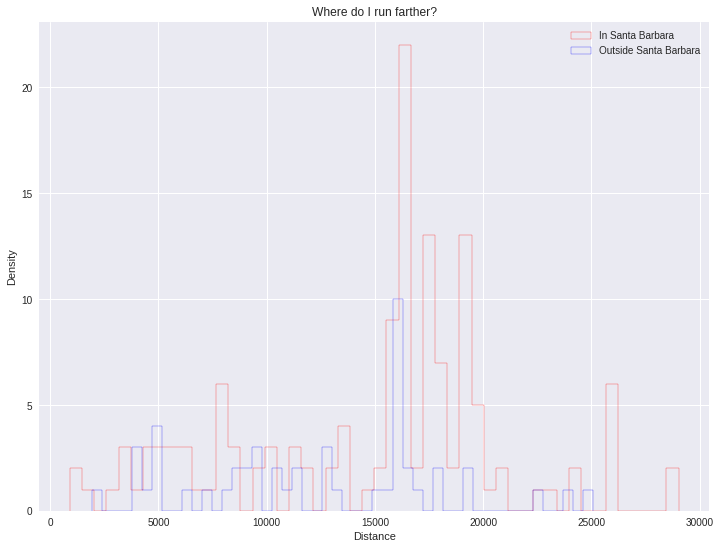

In [18]:
plt.figure(figsize = (12,9)) # distance hist
plt.hist(activitydf.distance.loc[activitydf.location == 'Santa Barbara, CA'], histtype = 'step', label = "In Santa Barbara", color = "red", bins = 50)
plt.hist(activitydf.distance.loc[activitydf.location != 'Santa Barbara, CA'], histtype = 'step', label = "Outside Santa Barbara", color = "blue", bins = 50)
plt.legend()
plt.xlabel("Distance")
plt.ylabel("Density")
plt.title("Where do I run farther?")

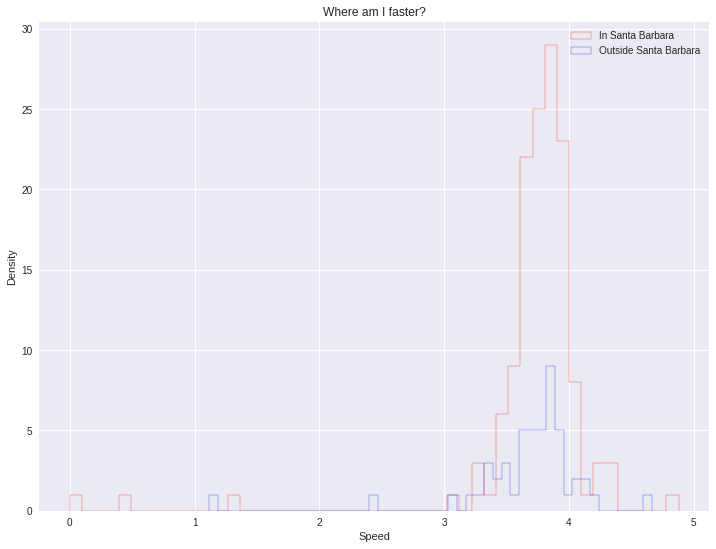

In [19]:
plt.figure(figsize = (12,9)) # speed hist
plt.hist(activitydf.average_speed.loc[activitydf.location == 'Santa Barbara, CA'], histtype = 'step', label = "In Santa Barbara", color = "red", bins = 50)
plt.hist(activitydf.average_speed.loc[activitydf.location != 'Santa Barbara, CA'], histtype = 'step', label = "Outside Santa Barbara", color = "blue", bins = 50)
plt.legend()
plt.xlabel("Speed")
plt.ylabel("Density")
plt.title("Where am I faster?")

Based on the data, it does not look like there is much difference between me running in Santa Barbara on the track team and me running in places other than Santa Barbara. The means were calculated below for speed and distance inside and outside Santa Barbara. 

In [20]:
print('Mean distance outside SB:', np.mean(activitydf.distance.loc[activitydf.location != 'Santa Barbara, CA']))
print('Mean distance inside SB:', np.mean(activitydf.distance.loc[activitydf.location == 'Santa Barbara, CA']))
print('Mean speed outside SB:', np.mean(activitydf.average_speed.loc[activitydf.location != 'Santa Barbara, CA']))
print('Mean speed inside SB:', np.mean(activitydf.average_speed.loc[activitydf.location == 'Santa Barbara, CA']))


Mean distance outside SB: 12379.998
Mean distance inside SB: 14870.4536232
Mean speed outside SB: 3.6602
Mean speed inside SB: 3.73157246377


Though hard to see in the plots, I did run slightly faster and longer in Santa Barbara over the past few months than other locations.